In [5]:
#Importing File

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('zomato_restaurants_in_India.csv')
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [8]:
#Data Cleaning and Preparation

In [9]:
#Checking for duplicates

In [10]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
211939     True
211940    False
211941     True
211942    False
211943     True
Length: 211944, dtype: bool

In [11]:
df_cleaned = df.drop_duplicates(keep='first')

In [12]:
df_cleaned.shape

(60417, 26)

In [13]:
missing_values = df_cleaned.isnull().sum()
missing_values 

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 47869
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1070
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          19
delivery                    0
takeaway                    0
dtype: int64

In [14]:
#Handling Missing Values

In [15]:
# Drop rows where 'address' is missing
df_cleaned = df_cleaned.dropna(subset=['address'])

In [16]:
# Drop the 'zipcode' column
df_cleaned = df_cleaned.drop(columns=['zipcode'])

In [17]:
# Filling missing 'cuisines' and 'timings' with "Not Specified"
df_cleaned['cuisines'] = df_cleaned['cuisines'].fillna('Not Specified')
df_cleaned['timings'] = df_cleaned['timings'].fillna('Not Specified')

In [18]:
opentable_mode = df_cleaned['opentable_support'].mode()[0]
df_cleaned['opentable_support'] = df_cleaned['opentable_support'].fillna(opentable_mode)

In [19]:
df_cleaned.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [20]:
data_types = df_cleaned.dtypes

In [21]:
categorical_columns = ['establishment', 'city', 'locality', 'currency', 'price_range', 'rating_text']
unique_values = {column: df_cleaned[column].unique() for column in categorical_columns}

data_types, unique_values

(res_id                    int64
 name                     object
 establishment            object
 url                      object
 address                  object
 city                     object
 city_id                   int64
 locality                 object
 latitude                float64
 longitude               float64
 country_id                int64
 locality_verbose         object
 cuisines                 object
 timings                  object
 average_cost_for_two      int64
 price_range               int64
 currency                 object
 highlights               object
 aggregate_rating        float64
 rating_text              object
 votes                     int64
 photo_count               int64
 opentable_support       float64
 delivery                  int64
 takeaway                  int64
 dtype: object,
 {'establishment': array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
         "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']"

In [22]:
import ast

#Converting to string
def convert_string_to_list(string):
    try:
        return ast.literal_eval(string)
    except (ValueError, SyntaxError):
        return [string]

In [23]:
# Converting 'establishment' and 'cuisines' from string representations to lists
df_cleaned['establishment'] = df_cleaned['establishment'].apply(convert_string_to_list)
df_cleaned['cuisines'] = df_cleaned['cuisines'].apply(convert_string_to_list)

In [24]:
# Normalizing the 'rating_text' to ensure consistency in English
rating_text_mapping = {
    'Dobré': 'Good', 'Baik': 'Good', 'Sangat Baik': 'Very Good', 'Excelente': 'Excellent',
    'Bardzo dobrze': 'Very Good', 'Wybitnie': 'Excellent', 'Ottimo': 'Excellent',
    'Muito Bom': 'Very Good', 'Velmi dobré': 'Very Good', 'Skvělá volba': 'Excellent Choice',
    'Muy Bueno': 'Very Good', 'Bom': 'Good', 'İyi': 'Good', 'Çok iyi': 'Very Good',
    'Harika': 'Great', 'Terbaik': 'Best', 'Skvělé': 'Great', 'Průměr': 'Average',
    'Ortalama': 'Average', 'Bueno': 'Good', 'Eccellente': 'Excellent', 'Muito bom': 'Very Good',
    'Dobrze': 'Well', 'Buono': 'Good', 'Média': 'Average', 'Scarso': 'Poor', 'Promedio': 'Average',
    'Veľmi dobré': 'Very Good', 'Vynikajúce': 'Excellent', 'Średnio': 'Average', 'Priemer': 'Average',
    'Biasa': 'Ordinary', 'Media': 'Average'
}

In [25]:
# Map the non-English rating texts to their English equivalents
df_cleaned['rating_text'] = df_cleaned['rating_text'].replace(rating_text_mapping)

In [26]:
#Exploratory Data Analysis

In [27]:
import pandas as pd
import numpy as np
df_cleaned.describe(include=[np.number])

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,6.039900e+04,60399.000000,60399.000000,60399.000000,60399.0,60399.000000,60399.000000,60399.000000,60399.000000,60399.000000,60399.0,60399.000000,60399.0
mean,1.309195e+07,3416.319393,21.349209,76.586037,1.0,538.425206,1.730972,3.033547,261.643504,194.299227,0.0,-0.371645,-1.0
std,8.133370e+06,5178.485741,41.194127,10.600930,0.0,593.864912,0.880464,1.440212,728.380119,705.780031,0.0,0.925310,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.000475e+06,7.000000,16.321540,74.653081,1.0,200.000000,1.000000,2.900000,7.000000,1.000000,0.0,-1.000000,-1.0
50%,1.869150e+07,26.000000,22.320810,77.134405,1.0,400.000000,1.000000,3.500000,42.000000,11.000000,0.0,-1.000000,-1.0
75%,1.886671e+07,11295.000000,26.744584,79.927777,1.0,600.000000,2.000000,4.000000,207.000000,82.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [28]:

# Selecting only numeric columns for calculations
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Central Tendency: Mean, Median, and Mode
central_tendency = pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Mode': numeric_df.mode().iloc[0]  # Mode might return multiple values; we take the first one for each column
})

# Dispersion: Standard Deviation, Variance, Min, Max, Range
dispersion = pd.DataFrame({
    'Standard Deviation': numeric_df.std(),
    'Variance': numeric_df.var(),
    'Minimum': numeric_df.min(),
    'Maximum': numeric_df.max(),
    'Range': numeric_df.max() - numeric_df.min()
})

# Shape: Skewness and Kurtosis
shape = pd.DataFrame({
    'Skewness': numeric_df.skew(),
    'Kurtosis': numeric_df.kurtosis()
})

# Print the results
print("Central Tendency:\n", central_tendency, "\n")
print("Dispersion:\n", dispersion, "\n")
print("Shape:\n", shape, "\n")


Central Tendency:
                               Mean        Median        Mode
res_id                1.309195e+07  1.869150e+07  18453954.0
city_id               3.416319e+03  2.600000e+01         3.0
latitude              2.134921e+01  2.232081e+01         0.0
longitude             7.658604e+01  7.713440e+01         0.0
country_id            1.000000e+00  1.000000e+00         1.0
average_cost_for_two  5.384252e+02  4.000000e+02       200.0
price_range           1.730972e+00  1.000000e+00         1.0
aggregate_rating      3.033547e+00  3.500000e+00         0.0
votes                 2.616435e+02  4.200000e+01         0.0
photo_count           1.942992e+02  1.100000e+01         0.0
opentable_support     0.000000e+00  0.000000e+00         0.0
delivery             -3.716452e-01 -1.000000e+00        -1.0
takeaway             -1.000000e+00 -1.000000e+00        -1.0 

Dispersion:
                       Standard Deviation      Variance  Minimum       Maximum  \
res_id                      8.1

In [29]:
#Visualizations 

/tmp/ipykernel_123/3529094388.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


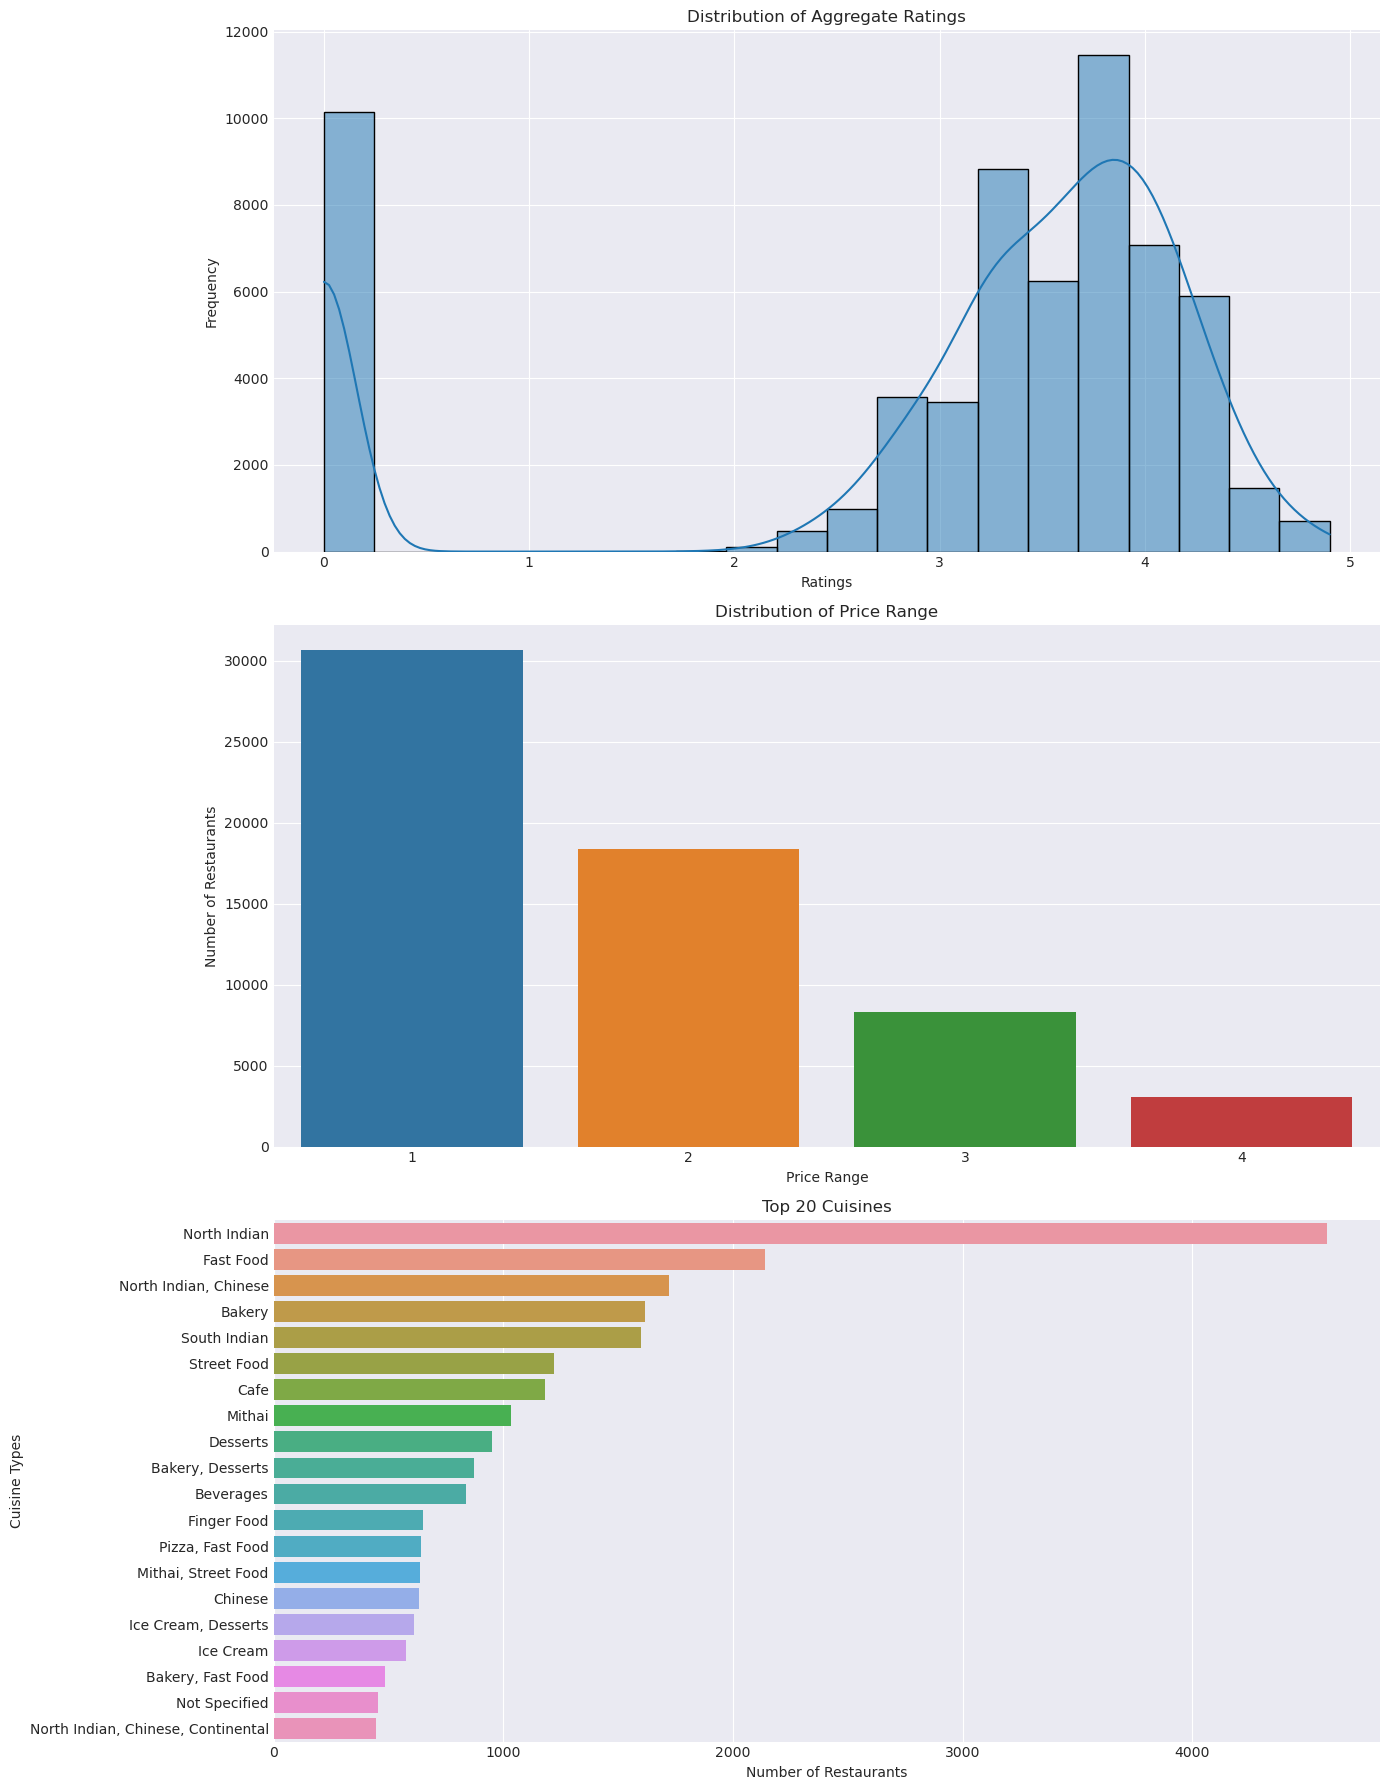

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size and style for better visibility
plt.figure(figsize=(14, 18))
plt.style.use('seaborn-darkgrid')

# Plot 1: Distribution of Ratings
plt.subplot(3, 1, 1)
sns.histplot(df_cleaned['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

# Plot 2: Distribution of Price Range
plt.subplot(3, 1, 2)
sns.countplot(x='price_range', data=df_cleaned)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')

# Plot 3: Distribution of Cuisines
plt.subplot(3, 1, 3)
# Flatten the list of cuisines and count occurrences
cuisine_list = [cuisine for sublist in df_cleaned['cuisines'].dropna() for cuisine in sublist]
cuisine_series = pd.Series(cuisine_list)
cuisine_counts = cuisine_series.value_counts().head(20)  # Show top 20 cuisines
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index)
plt.title('Top 20 Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Types')

# Show the plots
plt.tight_layout()
plt.show()

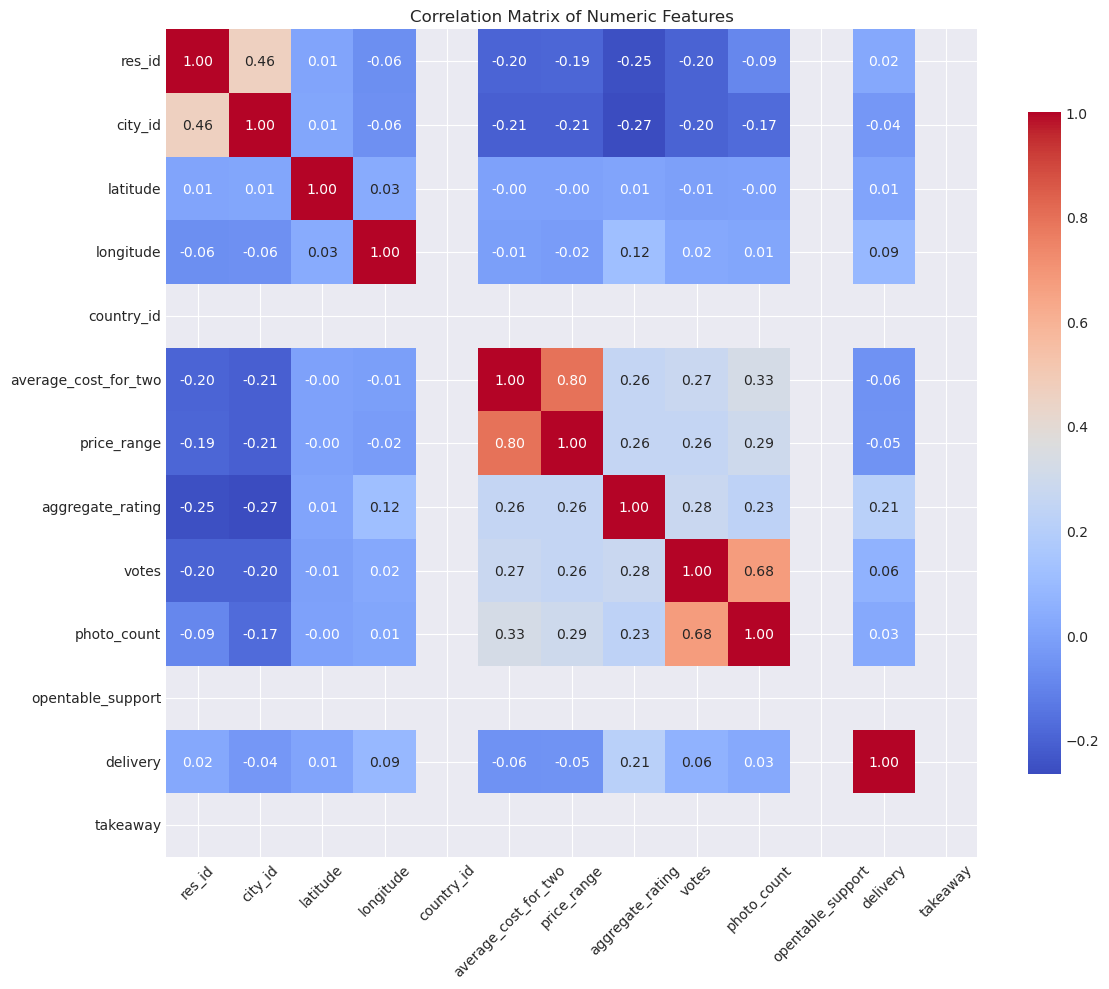

In [31]:

correlation_matrix = df_cleaned.select_dtypes(include=[np.number]).corr()


plt.figure(figsize=(12, 10))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  


plt.show()


In [32]:
#Regional Analysis

In [33]:
#Distribution of restaurant types

<Figure size 1400x800 with 0 Axes>

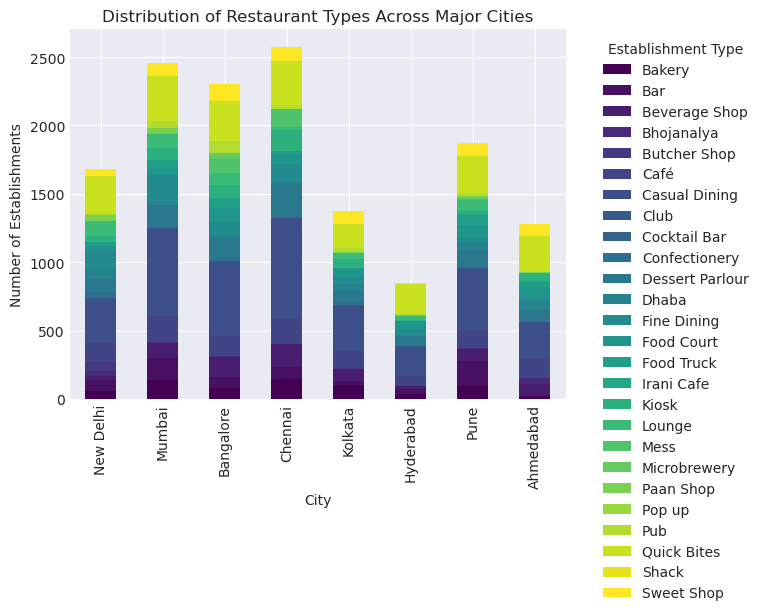

In [34]:
establishment_expanded = df_cleaned.explode('establishment')
city_establishment_counts = establishment_expanded.groupby(['city', 'establishment']).size().unstack(fill_value=0)

# Plot for a few major cities to manage visibility
major_cities = ['New Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Kolkata', 'Hyderabad', 'Pune', 'Ahmedabad']
city_establishment_subset = city_establishment_counts.loc[major_cities]

# Plotting
plt.figure(figsize=(14, 8))
city_establishment_subset.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Restaurant Types Across Major Cities')
plt.xlabel('City')
plt.ylabel('Number of Establishments')
plt.legend(title='Establishment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [35]:
#Customer ratings and reviews across different cities

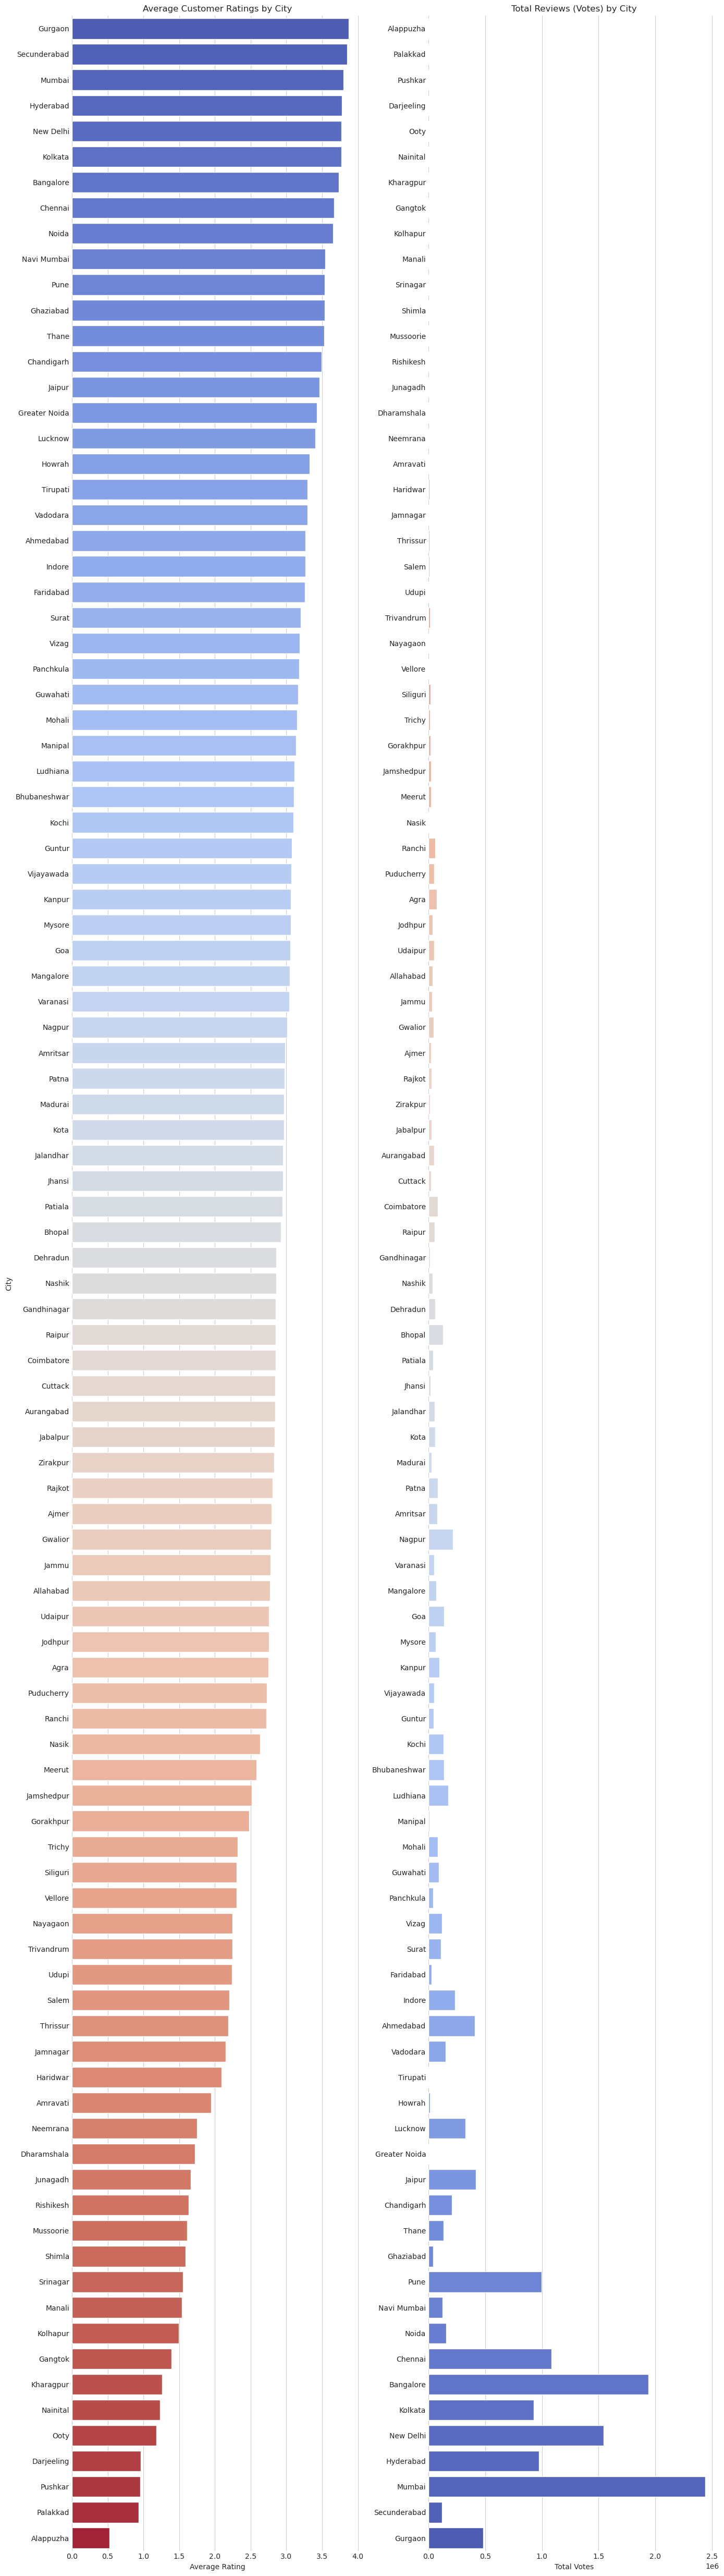

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate the data by city
city_ratings = df_cleaned.groupby('city').agg({
    'aggregate_rating': 'mean',  # Calculate the average rating for each city
    'votes': 'sum'               # Sum up all the votes for each city
}).reset_index()

# Sorting the data for better visualization
city_ratings = city_ratings.sort_values(by='aggregate_rating', ascending=False)

# Plotting
plt.figure(figsize=(14, len(city_ratings) * 0.5))  # Adjust figure height based on the number of cities

# Create a bar plot for average ratings
plt.subplot(1, 2, 1)
sns.barplot(x='aggregate_rating', y='city', data=city_ratings, palette='coolwarm')
plt.title('Average Customer Ratings by City')
plt.xlabel('Average Rating')
plt.ylabel('City')

# Create a bar plot for total votes
plt.subplot(1, 2, 2)
sns.barplot(x='votes', y='city', data=city_ratings, palette='coolwarm')
plt.title('Total Reviews (Votes) by City')
plt.xlabel('Total Votes')
plt.ylabel('')

# Adjusting the spacing between y-axis ticks for both plots
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [37]:
#Price sensitivity

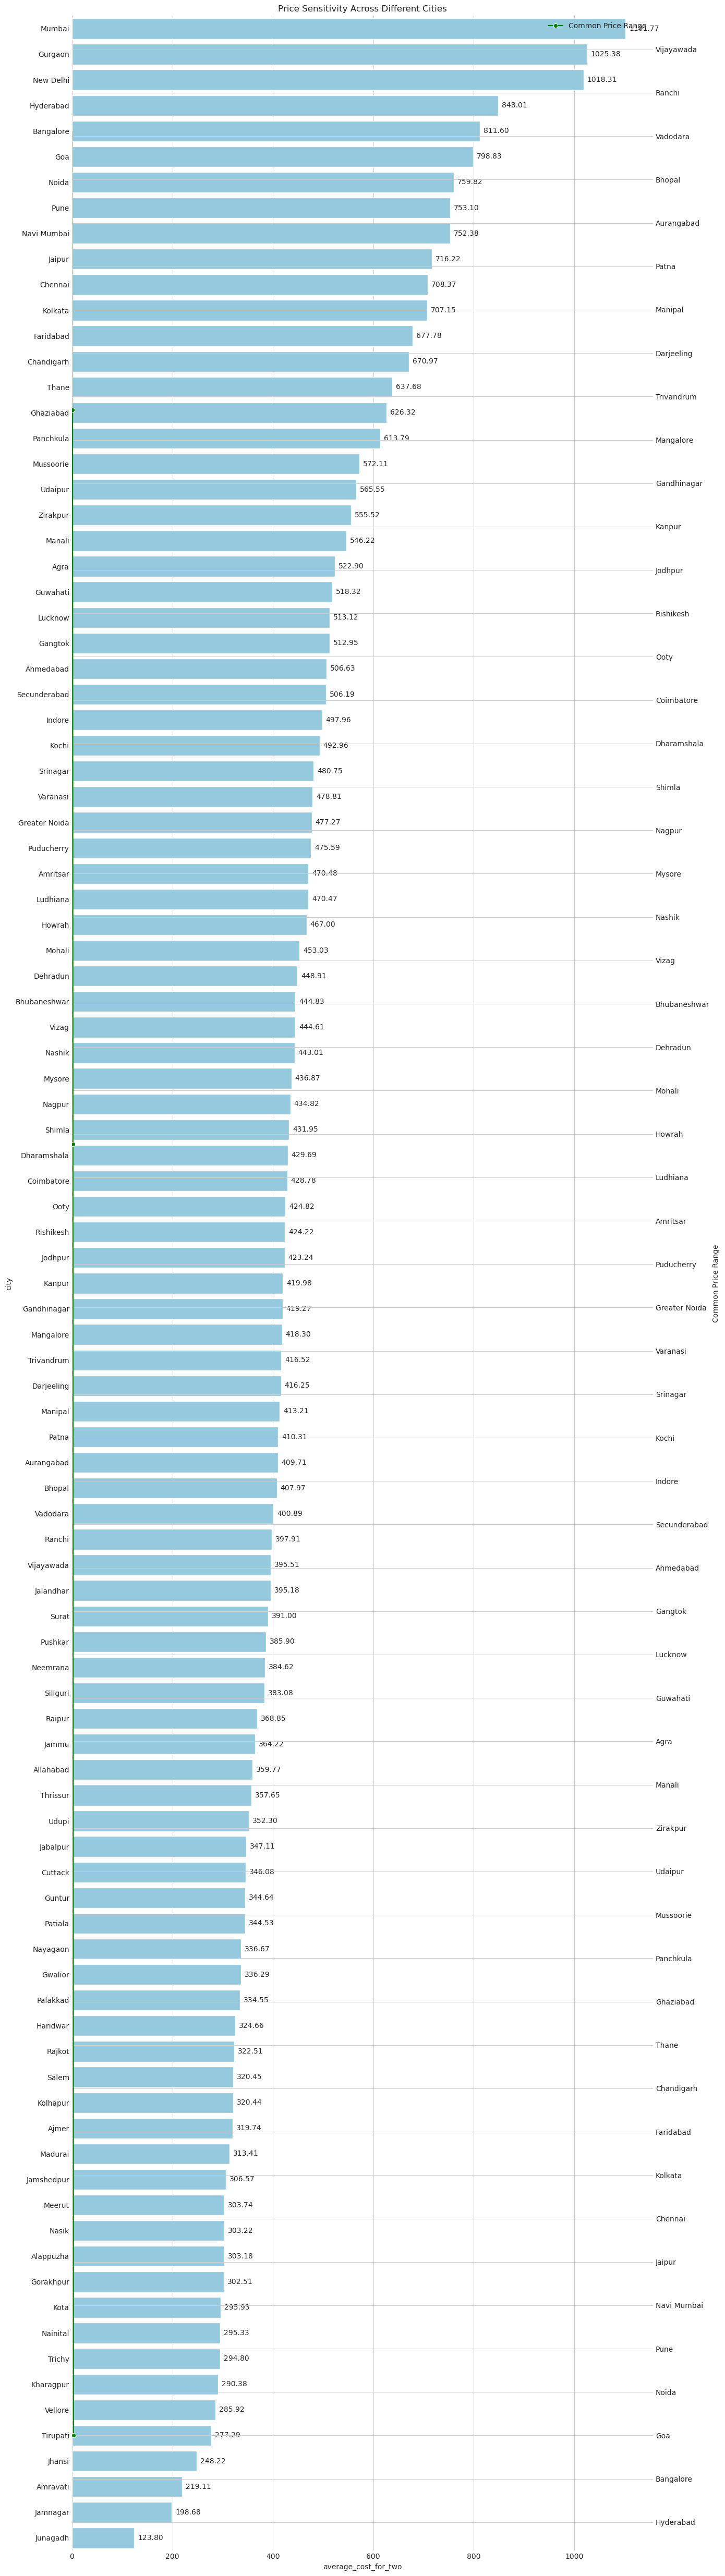

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the mean average cost and the mode of the price range per city
city_price_sensitivity = df_cleaned.groupby('city').agg({
    'average_cost_for_two': 'mean',  # Average cost for two per city
    'price_range': lambda x: x.mode()[0]  # Most common price range per city
}).reset_index()

# Sorting the results for better visualization
city_price_sensitivity = city_price_sensitivity.sort_values(by='average_cost_for_two', ascending=False)

# Plotting
plt.figure(figsize=(14, len(city_price_sensitivity) * 0.5))  # Adjust figure height based on the number of cities
sns.set_style("whitegrid")

# Creating a bar plot for average cost for two
cost_bar = sns.barplot(x='average_cost_for_two', y='city', data=city_price_sensitivity, color='skyblue', label='Average Cost for Two')

# Creating a secondary y-axis for price range
ax2 = plt.gca().twinx()
price_line = sns.lineplot(x='price_range', y='city', data=city_price_sensitivity, marker='o', color='green', label='Common Price Range', ax=ax2)

# Adding labels and legend
plt.title('Price Sensitivity Across Different Cities')
ax2.set_ylabel('Common Price Range')
plt.legend(loc='upper right')

# Adjusting the spacing between y-axis ticks for the bar plot
plt.gca().invert_yaxis()

# Adding text labels for the average cost
for p, label in zip(cost_bar.patches, city_price_sensitivity['average_cost_for_two']):
    cost_bar.annotate(format(label, '.2f'), 
                        (p.get_width(), p.get_y() + p.get_height() / 2.), 
                        ha = 'left', va = 'center', 
                        xytext = (5, 0), 
                        textcoords = 'offset points')

plt.tight_layout()
plt.show()


In [39]:
# Unique characteristics of the dining scene in each region

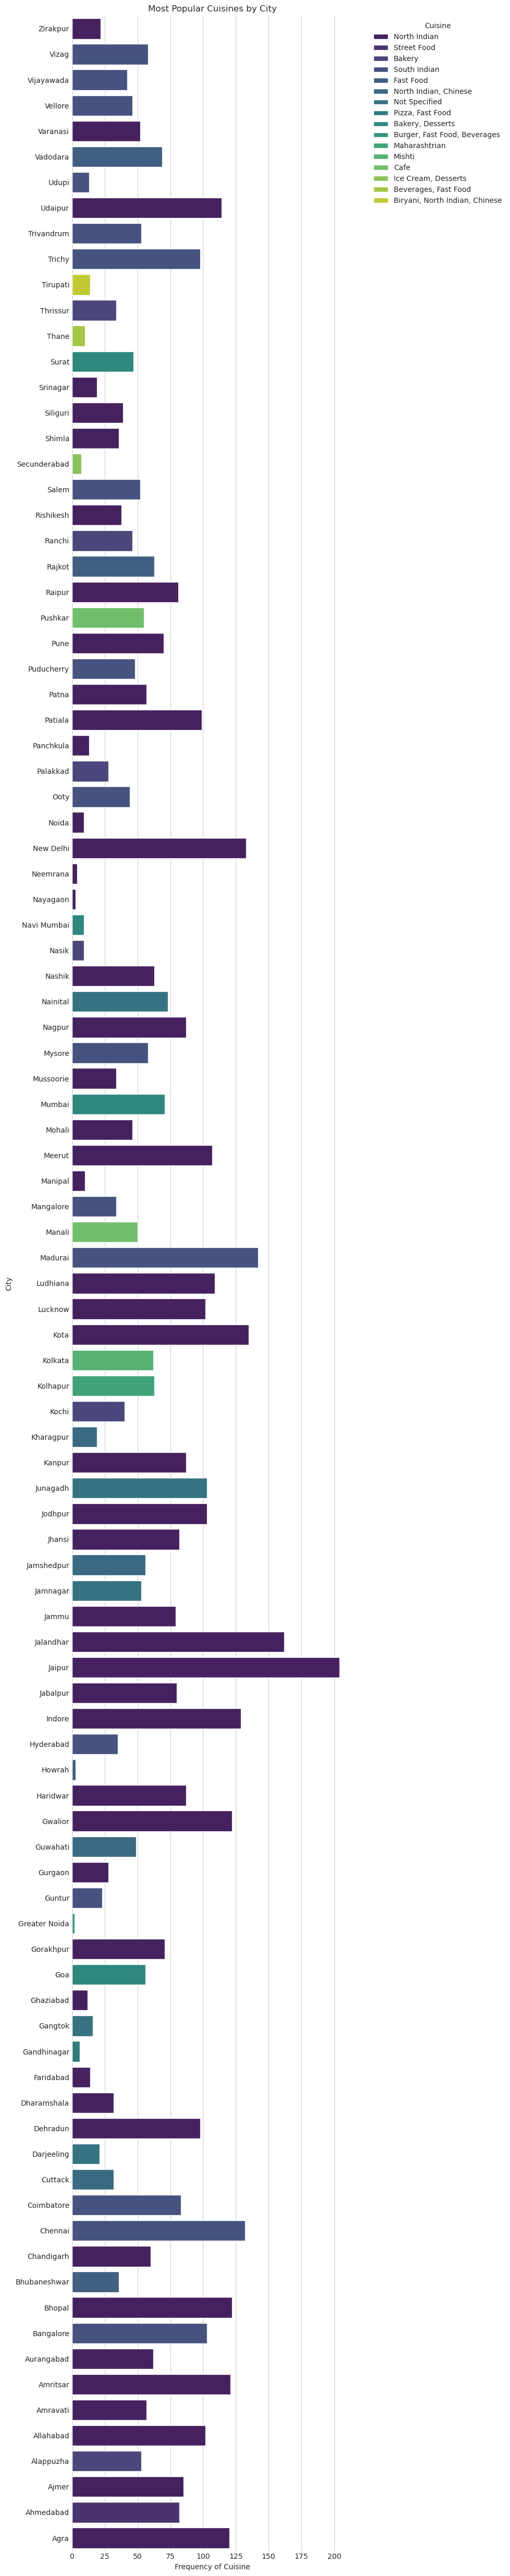

In [54]:

df_cleaned['cuisines'] = df_cleaned['cuisines'].apply(lambda x: x if isinstance(x, list) else [x])
cuisine_expanded = df_cleaned.explode('cuisines')

# Count the occurrences of each cuisine in each city
cuisine_counts = cuisine_expanded.groupby(['city', 'cuisines']).size().reset_index(name='counts')

# Identify the most common cuisine in each city
max_cuisine_per_city = cuisine_counts.loc[cuisine_counts.groupby('city')['counts'].idxmax()]

# Plotting
plt.figure(figsize=(10, len(max_cuisine_per_city['city']) * 0.5))  # Adjust figure height based on the number of cities
sns.barplot(data=max_cuisine_per_city, y='city', x='counts', hue='cuisines', dodge=False, palette='viridis')
plt.title('Most Popular Cuisines by City')
plt.xlabel('Frequency of Cuisine')
plt.ylabel('City')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjusting the spacing between y-axis ticks
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
#Customer preference analysis

In [ ]:
#Popular cuisines in different regions

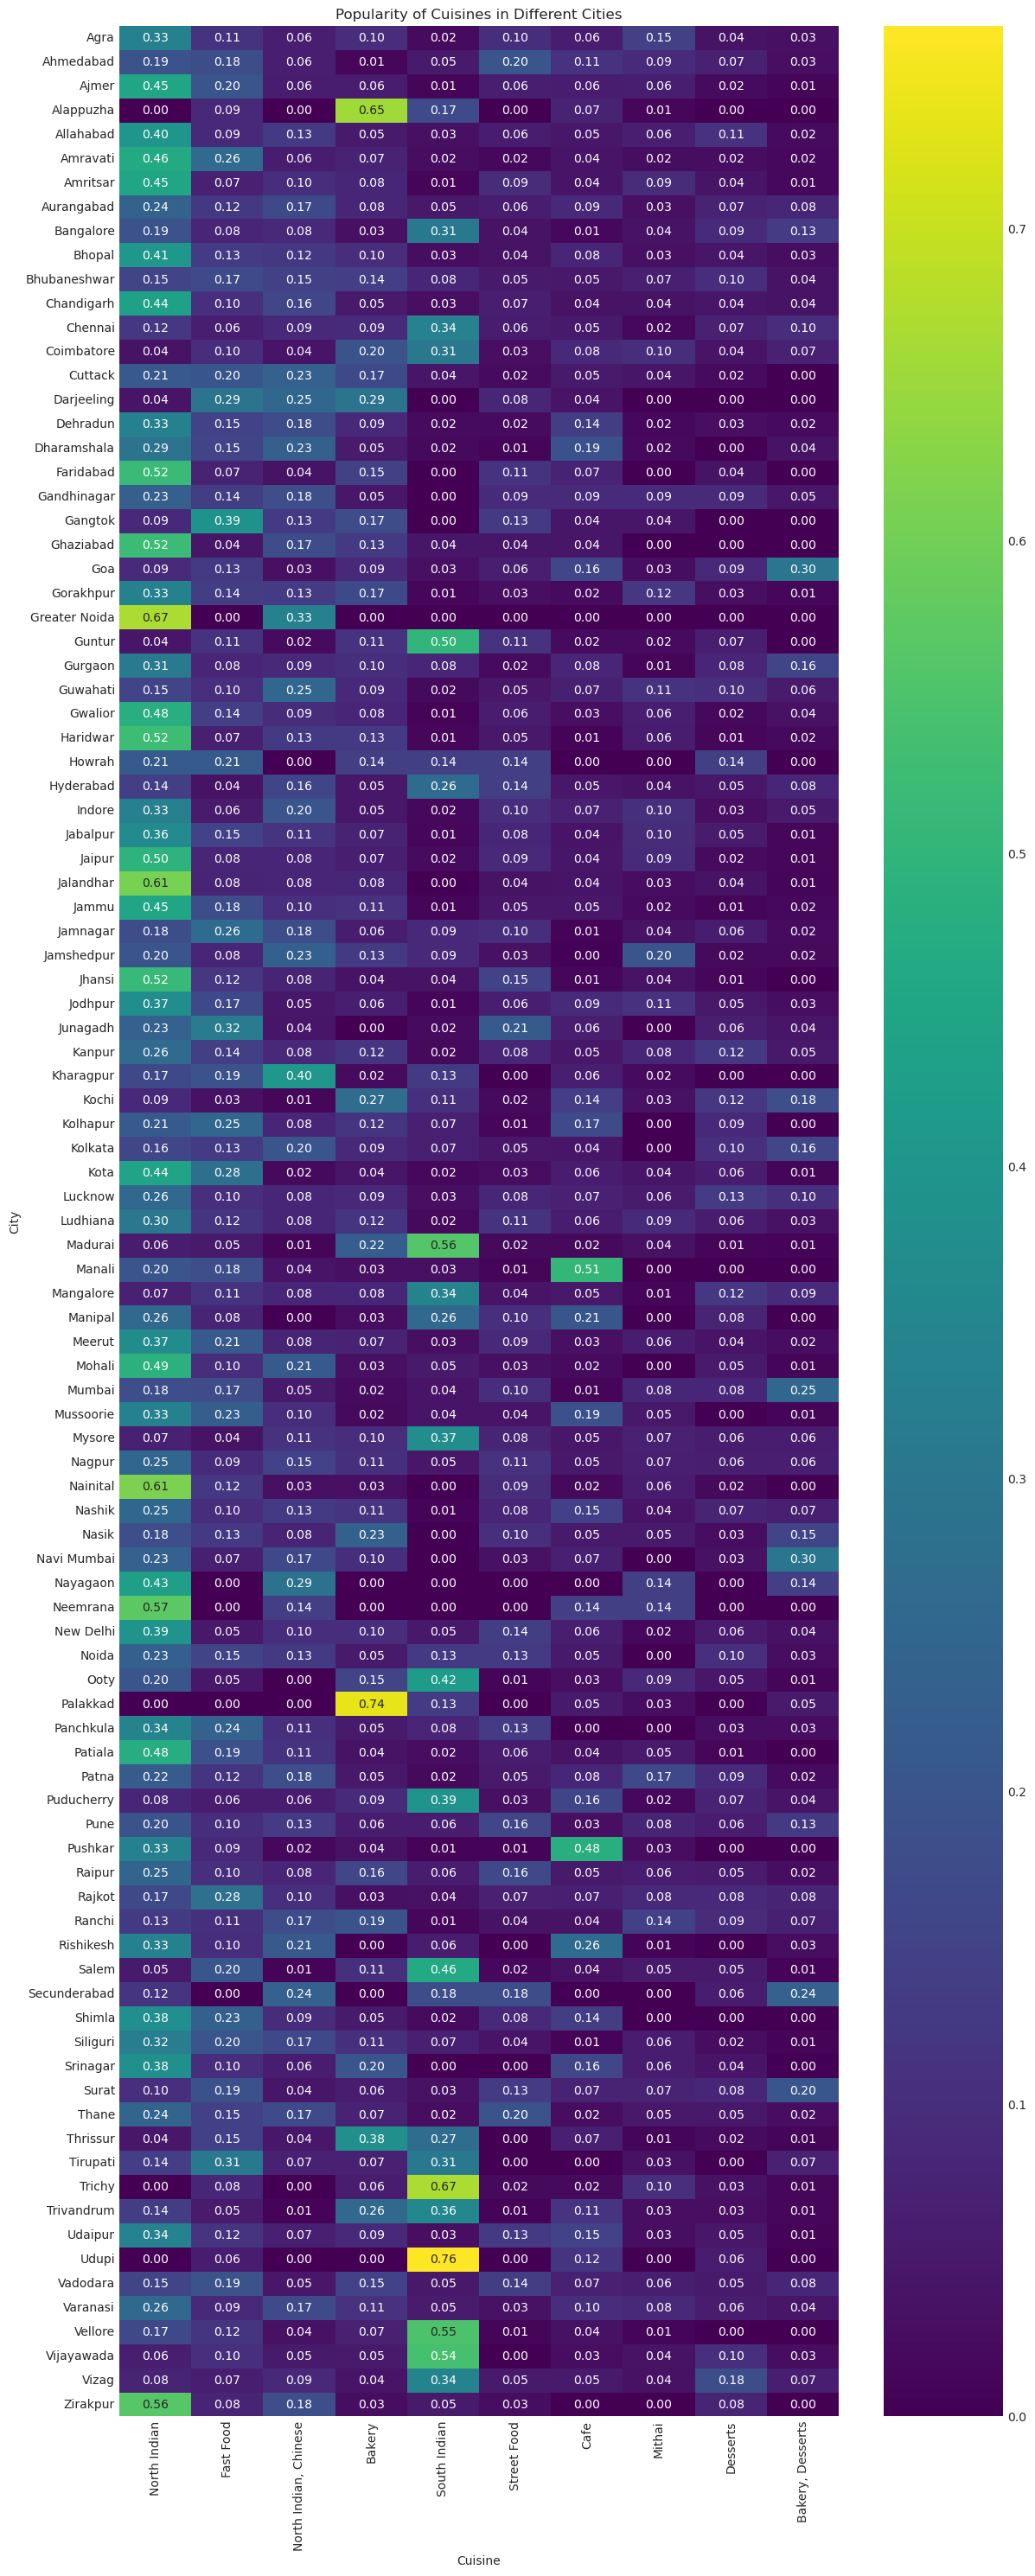

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjusting cuisine data
df_cleaned['cuisines'] = df_cleaned['cuisines'].apply(lambda x: x if isinstance(x, list) else [x])
cuisine_expanded = df_cleaned.explode('cuisines')

# Count cuisines by city
city_cuisine_counts = cuisine_expanded.groupby(['city', 'cuisines']).size().unstack(fill_value=0)

# Select top N cuisines for clarity in visualization
top_cuisines = city_cuisine_counts.sum().sort_values(ascending=False).head(10).index
city_top_cuisine_counts = city_cuisine_counts[top_cuisines]

# Normalize the data by total number of restaurants in each city for a fair comparison
city_cuisine_proportions = city_top_cuisine_counts.div(city_top_cuisine_counts.sum(axis=1), axis=0)

# Plotting with a heatmap
plt.figure(figsize=(12, len(city_cuisine_proportions) * 0.3))  # Adjust figure height based on the number of cities
sns.heatmap(city_cuisine_proportions, annot=True, cmap='viridis', fmt=".2f")

# Adjusting the spacing between y-axis ticks
plt.yticks(rotation=0)
plt.tight_layout()
plt.title('Popularity of Cuisines in Different Cities')
plt.xlabel('Cuisine')
plt.ylabel('City')
plt.show()


In [ ]:
#Relationship between restaurant ratings, price range, and popularity

Correlation Matrix:
                   aggregate_rating  price_range     votes
aggregate_rating          1.000000     0.257492  0.277505
price_range               0.257492     1.000000  0.255654
votes                     0.277505     0.255654  1.000000


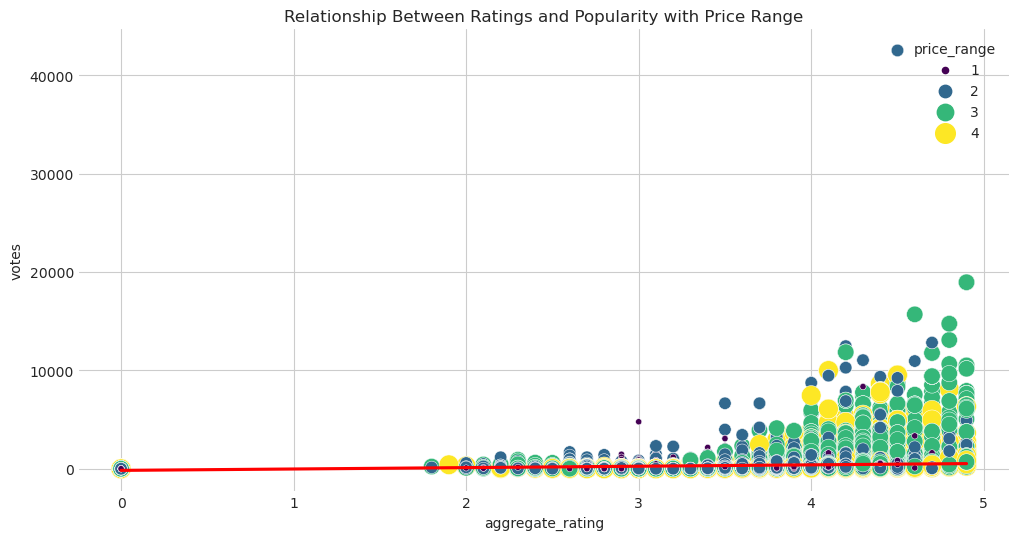

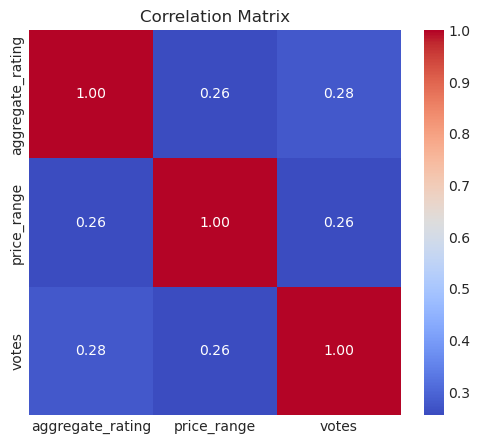

In [64]:
# Correlation Analysis
correlations = df_cleaned[['aggregate_rating', 'price_range', 'votes']].corr()
print("Correlation Matrix:\n", correlations)

#  Visualization
# Scatter plot for Rating vs. Votes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='aggregate_rating', y='votes', data=df_cleaned, hue='price_range', palette='viridis', size='price_range', sizes=(20, 200))
plt.title('Relationship Between Ratings and Popularity with Price Range')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes (Popularity)')

# Enhancing visibility with a regression line
sns.regplot(x='aggregate_rating', y='votes', data=df_cleaned, scatter=False, color='red')

plt.show()

# Heatmap for Correlation Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Competitive analysis

In [ ]:
#Major competitors in each region based on cuisine, pricing, and ratings

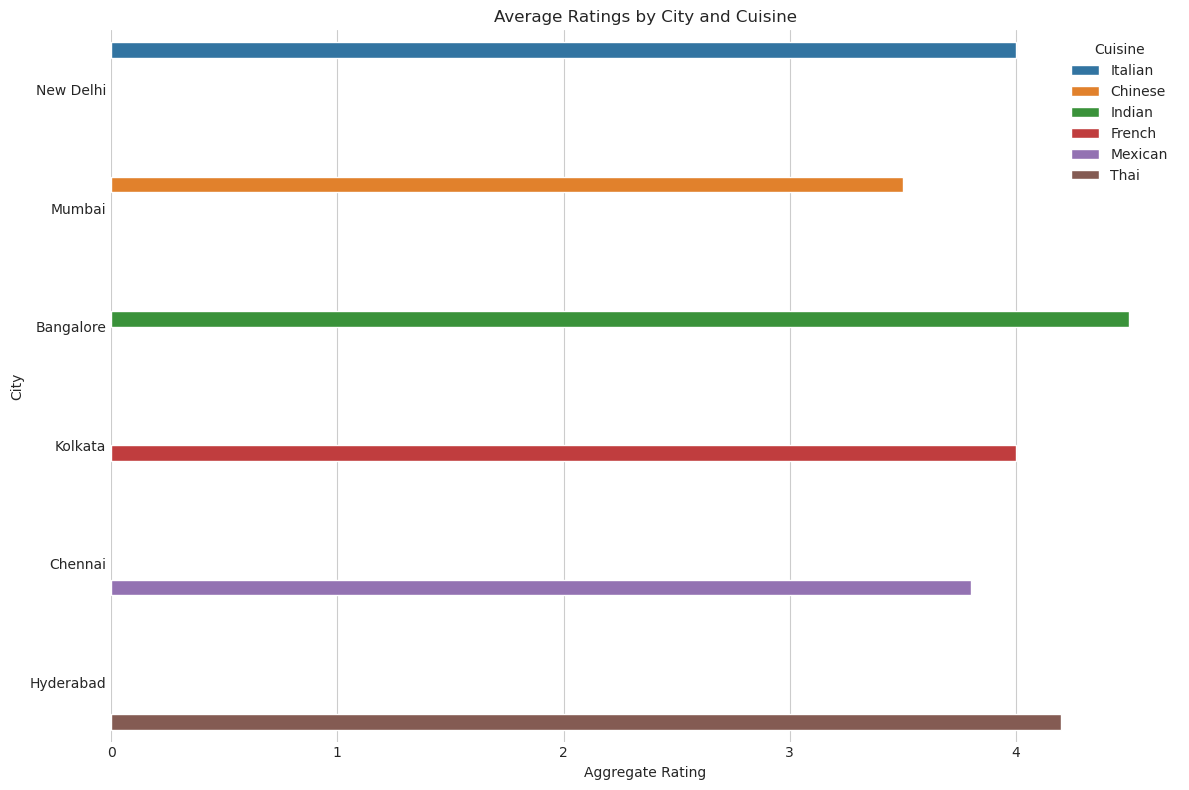

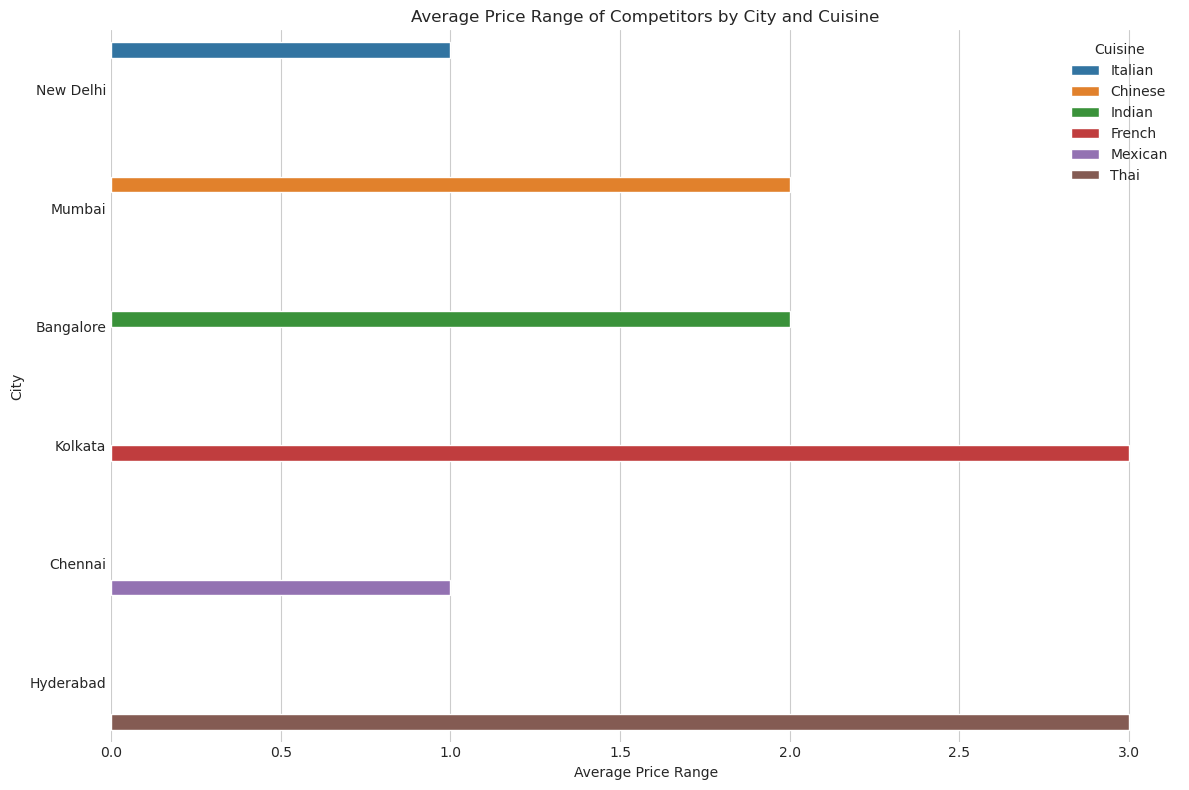

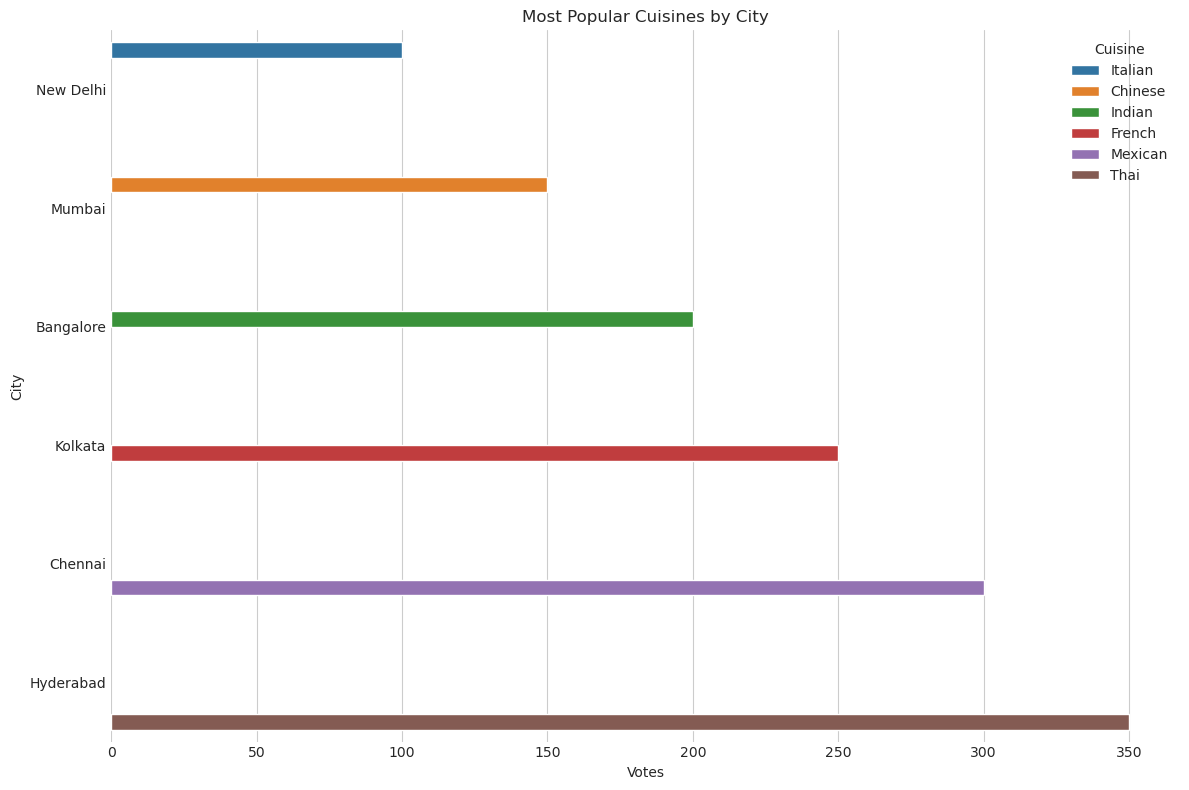

In [66]:

data = {
    'city': ['New Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Chennai', 'Hyderabad'],
    'cuisines': ['Italian', 'Chinese', 'Indian', 'French', 'Mexican', 'Thai'],
    'votes': [100, 150, 200, 250, 300, 350],
    'price_range': [1, 2, 2, 3, 1, 3],
    'aggregate_rating': [4.0, 3.5, 4.5, 4.0, 3.8, 4.2]
}
df_cleaned = pd.DataFrame(data)

# Assuming data grouping and aggregation as before
top_competitors_per_city = df_cleaned

# Average Ratings by City and Cuisine
plt.figure(figsize=(12, 8))
sns.barplot(data=top_competitors_per_city, x='aggregate_rating', y='city', hue='cuisines')
plt.title('Average Ratings by City and Cuisine')
plt.xlabel('Aggregate Rating')
plt.ylabel('City')
plt.legend(title='Cuisine')
plt.tight_layout()
plt.show()

# Average Price Range by City and Cuisine
plt.figure(figsize=(12, 8))
sns.barplot(data=top_competitors_per_city, x='price_range', y='city', hue='cuisines')
plt.title('Average Price Range of Competitors by City and Cuisine')
plt.xlabel('Average Price Range')
plt.ylabel('City')
plt.legend(title='Cuisine')
plt.tight_layout()
plt.show()

# Most Popular Cuisines by City
plt.figure(figsize=(12, 8))
sns.barplot(data=top_competitors_per_city, x='votes', y='city', hue='cuisines')
plt.title('Most Popular Cuisines by City')
plt.xlabel('Votes')
plt.ylabel('City')
plt.legend(title='Cuisine')
plt.tight_layout()
plt.show()


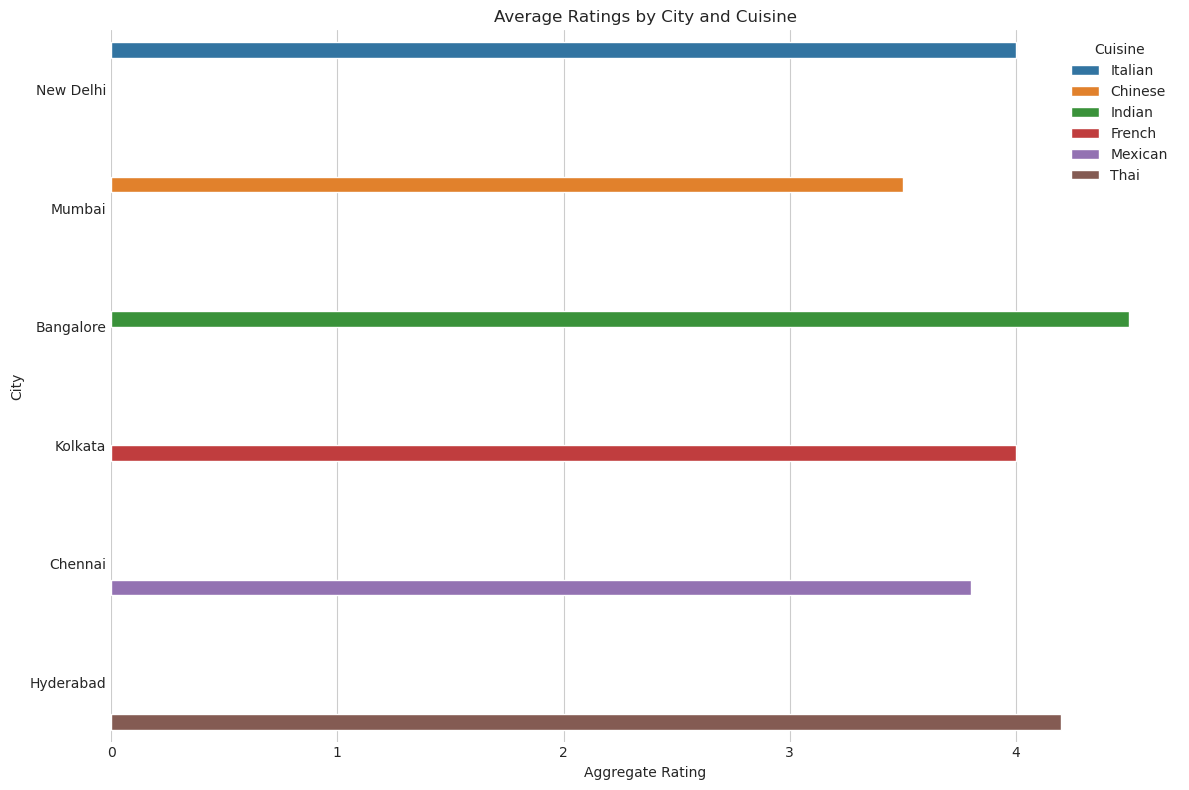

In [70]:
top_competitors_per_city = df_cleaned

# Average Ratings by City and Cuisine
plt.figure(figsize=(12, 8))
sns.barplot(data=top_competitors_per_city, x='aggregate_rating', y='city', hue='cuisines')
plt.title('Average Ratings by City and Cuisine')
plt.xlabel('Aggregate Rating')
plt.ylabel('City')
plt.legend(title='Cuisine')
plt.tight_layout()
plt.show()